In [1]:
import re
import pandas as pd

In [2]:
f = open('WhatsApp Chat with Students of M.Tech AI.txt','r',encoding='utf-8')

In [3]:
data=f.read()

In [4]:
print(type(data))
len(data)

<class 'str'>


786747

In [5]:
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

In [6]:
messages = re.split(pattern,data)[1:]
len(messages)
messages

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 'Keshav created group "Students of Mtech AI "\n',
 'Keshav added you\n',
 'Keshav added Nitj Priya Mishra\n',
 'Keshav added Nitj Vishrut\n',
 'Keshav added Nitj surayansh saini\n',
 'Nitj Alina changed the subject from "Students of Mtech AI " to "Students of M.Tech AI"\n',
 "Keshav: Ye naya group bnaya gya h without any faculty or any adminstration interruption.\nIn another group there is kajal ma'am so feel free to discuss anything over here.\n",
 'Keshav added +91 82646 96566\n',
 'Nitj Vishrut: Unko remove krdete 😂😂\n',
 'Keshav added Vaibhavi\n',
 'Keshav: Bhai adminstration se thi vo toh sahi nhi lga remove Krna\n',
 'Keshav: 😅\n',
 'Nitj Puneet: Sahi kiya...it was required\n',
 'Nitj Vishrut: Us group ka koi fayda nhi na.... Koi notice hoga toh main group mai share hoskta hai\n',
 'Nitj Vishrut: Subgroup ki kya zarurat\n',
 'Keshav: G

In [7]:
dates = re.findall(pattern,data)
len(dates)
dates

['05/10/21, 18:03 - ',
 '05/10/21, 18:03 - ',
 '05/10/21, 18:03 - ',
 '05/10/21, 18:04 - ',
 '05/10/21, 18:04 - ',
 '05/10/21, 18:04 - ',
 '05/10/21, 18:06 - ',
 '05/10/21, 18:08 - ',
 '05/10/21, 18:08 - ',
 '05/10/21, 18:09 - ',
 '05/10/21, 18:09 - ',
 '05/10/21, 18:10 - ',
 '05/10/21, 18:10 - ',
 '05/10/21, 18:10 - ',
 '05/10/21, 18:10 - ',
 '05/10/21, 18:11 - ',
 '05/10/21, 18:11 - ',
 '05/10/21, 18:11 - ',
 '05/10/21, 18:12 - ',
 '05/10/21, 18:13 - ',
 '05/10/21, 18:13 - ',
 '05/10/21, 18:13 - ',
 '05/10/21, 18:14 - ',
 '05/10/21, 18:14 - ',
 '05/10/21, 18:14 - ',
 '05/10/21, 18:15 - ',
 '05/10/21, 18:15 - ',
 '05/10/21, 18:16 - ',
 '05/10/21, 18:17 - ',
 '05/10/21, 18:19 - ',
 '05/10/21, 18:19 - ',
 '05/10/21, 18:21 - ',
 '05/10/21, 18:22 - ',
 '05/10/21, 18:23 - ',
 '05/10/21, 18:23 - ',
 '05/10/21, 18:24 - ',
 '05/10/21, 18:24 - ',
 '05/10/21, 18:24 - ',
 '05/10/21, 18:27 - ',
 '05/10/21, 19:13 - ',
 '05/10/21, 19:13 - ',
 '05/10/21, 19:17 - ',
 '06/10/21, 08:44 - ',
 '06/10/21,

In [8]:
df = pd.DataFrame({'user_message':messages, 'message_date':dates})
df.head(5)

,user_message,message_date
0,Messages and calls are end-to-end encrypted. N...,"05/10/21, 18:03 -"
1,"Keshav created group ""Students of Mtech AI ""\n","05/10/21, 18:03 -"
2,Keshav added you\n,"05/10/21, 18:03 -"
3,Keshav added Nitj Priya Mishra\n,"05/10/21, 18:04 -"
4,Keshav added Nitj Vishrut\n,"05/10/21, 18:04 -"


In [9]:
#convert message_date type
df['message_date']= pd.to_datetime(df['message_date'],format = '%d/%m/%y, %H:%M - ')
df.rename(columns={'message_date': 'date'},inplace=True)

In [10]:
df.sample(5)

,user_message,date
6356,Vaibhavi: Ye b sahi h ye hi m chahti hu ki mer...,2022-02-18 12:07:00
8406,Nitj surayansh saini: Intel On - campus Inter...,2022-04-26 14:15:00
5768,Nitj Ritika: Kya pta sir bul gye he\n,2022-02-09 14:39:00
2075,Nitj Ashish Sagar: thanks frns..\n,2021-11-25 15:42:00
4211,Nitj Ashish Sagar: Just wait n watch .. it wil...,2021-12-31 20:07:00


In [11]:
df.shape

(11504, 2)

In [12]:
#separate users and messages
users=[]
messages=[]
for message in df['user_message']:
    entry=re.split('([\w\W]+?):\s',message)
    if entry[1:]:#user name
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])
        
df['user']=users
df['messages']=messages
df.drop(columns=['user_message'],inplace=True)


In [13]:
df.sample(10)

,date,user,messages
10186,2022-08-03 09:33:00,Nitj Puneet,9:30\n
8364,2022-04-18 15:34:00,Nitj Soriful,<Media omitted>\n
3303,2021-12-10 12:32:00,Vaibhavi,3 bhje h n meeting to\n
6015,2022-02-11 17:14:00,Nitj Nikhil Lamba,"Haan, yahi bola mujhe bhi\n"
8566,2022-05-10 11:36:00,Nitj Shaurya,Bulla rahe haaa\n
630,2021-10-21 11:33:00,Nitj Ashish Sagar,ok..\n
6781,2022-02-28 10:03:00,Nitj Nikhil Lamba,Sir ne bola tha 5 min late hoga join krne me\n
6246,2022-02-18 11:46:00,Nitj surayansh saini,bhai vo online krvane k lea likh rahe hai\n
2753,2021-12-03 09:37:00,+91 82646 96566,https://meet.google.com/lookup/ftidmpwjca?auth...
2091,2021-11-26 10:37:00,Nitj Ritika,Has the class started\n


In [14]:
df.head()

,date,user,messages
0,2021-10-05 18:03:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2021-10-05 18:03:00,group_notification,"Keshav created group ""Students of Mtech AI ""\n"
2,2021-10-05 18:03:00,group_notification,Keshav added you\n
3,2021-10-05 18:04:00,group_notification,Keshav added Nitj Priya Mishra\n
4,2021-10-05 18:04:00,group_notification,Keshav added Nitj Vishrut\n


In [15]:
df['year']=df['date'].dt.year

In [16]:
df['month']=df['date'].dt.month_name()

In [17]:
 df['day']=df['date'].dt.day

In [18]:
df['hour']=df['date'].dt.hour

In [19]:
df['minute']=df['date'].dt.minute

In [20]:
df.sample(10)

,date,user,messages,year,month,day,hour,minute
889,2021-10-27 13:27:00,Nitj Ashish Sagar,😂\n,2021,October,27,13,27
10266,2022-08-11 19:47:00,Keshav,This message was deleted\n,2022,August,11,19,47
11299,2022-11-29 11:15:00,+91 82646 96566,Bnayi ni\n,2022,November,29,11,15
11457,2023-01-01 21:46:00,Jagrati,Happy new year everyone🎉🎉\n,2023,January,1,21,46
11076,2022-10-17 15:15:00,Nitj Sadbhav,Jb arun sir pressurize krge tb bhr dege\n,2022,October,17,15,15
1178,2021-11-09 11:50:00,Nitj Ashish Sagar,Search chess.com\n,2021,November,9,11,50
5835,2022-02-10 15:36:00,Nitj Nikhil Lamba,Anyone paid fees till now?\n,2022,February,10,15,36
8846,2022-05-25 18:58:00,Nitj Ashish Sagar,Haha\n,2022,May,25,18,58
7989,2022-04-06 18:23:00,Nitj Shaurya,Aaa jao app sir 10 15 min meee\n,2022,April,6,18,23
11105,2022-10-21 20:34:00,Nitj Vishrut,All the best susu bhai\n,2022,October,21,20,34


In [21]:
df[df['user']== 'Priyanka'].shape


(25, 8)

In [22]:
words=[]
for message in df['messages']:
    words.extend(message.split())

In [23]:
len(words)

61247

In [24]:
#! pip install urlextract
from urlextract import URLExtract

In [25]:
from urlextract import URLExtract

extractor = URLExtract()
urls = extractor.find_urls("Text with URLs. Let's have URL janlipovsky.cz as an example.")
print(urls)

['janlipovsky.cz']


In [26]:
df

,date,user,messages,year,month,day,hour,minute
0,2021-10-05 18:03:00,group_notification,Messages and calls are end-to-end encrypted. N...,2021,October,5,18,3
1,2021-10-05 18:03:00,group_notification,"Keshav created group ""Students of Mtech AI ""\n",2021,October,5,18,3
2,2021-10-05 18:03:00,group_notification,Keshav added you\n,2021,October,5,18,3
3,2021-10-05 18:04:00,group_notification,Keshav added Nitj Priya Mishra\n,2021,October,5,18,4
4,2021-10-05 18:04:00,group_notification,Keshav added Nitj Vishrut\n,2021,October,5,18,4
...,...,...,...,...,...,...,...,...
11499,2023-02-21 10:10:00,Nitj Shaurya,Kabbb\n,2023,February,21,10,10
11500,2023-02-21 10:10:00,Nitj Shaurya,Bhai\n,2023,February,21,10,10
11501,2023-02-21 14:26:00,Nitj Puneet,Happy Birthday Shushant🥳\n,2023,February,21,14,26
11502,2023-02-22 10:22:00,Priyanka,<Media omitted>\n,2023,February,22,10,22


In [59]:
x = df['user'].value_counts().tail()
x

group_notification    61
Nitj Piyali           37
Priyanka              25
Nitj Srikant          21
+91 87270 93970       11
Name: user, dtype: int64

In [74]:
import matplotlib.pyplot as plt
import numpy as np

<BarContainer object of 5 artists>

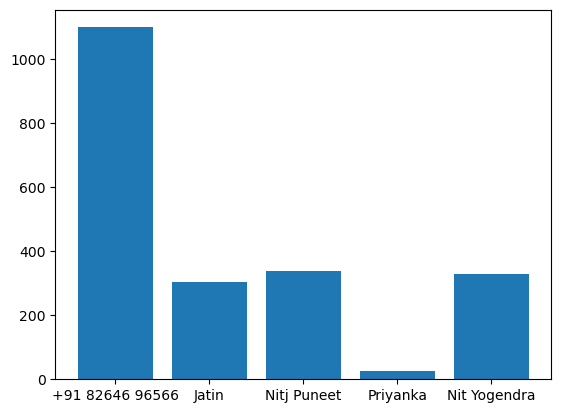

In [43]:
fig, ax = plt.subplots()
ax.bar(x.index, x.values)

In [86]:
round((df['user'].value_counts()/df.shape[0])*100,2)

Nitj surayansh saini    14.93
Nitj Ashish Sagar       14.72
+91 82646 96566          9.55
Nitj Sadbhav             9.43
Nitj Ritika              6.70
Jagrati                  5.80
Nitj Vishrut             5.63
Nitj Shaurya             4.89
Nitj Soriful             4.64
Keshav                   3.23
Nitj Puneet              2.93
Nit Yogendra             2.86
Vaibhavi                 2.81
Jatin                    2.65
Nitj Nikhil Lamba        2.62
Nitj Priya Mishra        1.97
Nitj Alina               1.63
Nitj Sushant             0.93
Nitj Karchana            0.74
group_notification       0.53
Nitj Piyali              0.32
Priyanka                 0.22
Nitj Srikant             0.18
+91 87270 93970          0.10
Name: user, dtype: float64

In [87]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'index':'name','user':'percent'})

,name,percent
0,Nitj surayansh saini,14.93
1,Nitj Ashish Sagar,14.72
2,+91 82646 96566,9.55
3,Nitj Sadbhav,9.43
4,Nitj Ritika,6.70
5,Jagrati,5.80
6,Nitj Vishrut,5.63
7,Nitj Shaurya,4.89
8,Nitj Soriful,4.64
9,Keshav,3.23
